In [126]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from supervised.automl import AutoML

### Dataset
##### FY 2023 HHS Contingency Staffing Plan for a Lapse in Appropriation

In [63]:
import pandas as pd
import numpy as np
csp = pd.read_csv('https://healthdata.gov/resource/nqtp-eetp.csv')
csp

,staff_involved,acf,acl,ahrq,aspr,cdc,cms,fda,hrsa,ihs,nih,os,samhsa,total
0,Staff normally paid from or shifted to adminis...,1.00,0.00,0.00,0.00,75.00,1662.00,0.00,792.00,61.00,0.00,1655.00,0.0,4246.000
1,Staff normally paid from or shifted to carryov...,639.00,8.00,13.00,428.00,2303.00,525.00,11714.00,523.00,258.00,230.00,1717.00,0.0,18358.000
2,Staff normally paid from or shifted to reimbur...,0.00,2.00,0.00,0.00,137.00,0.00,67.00,0.00,11766.00,0.00,19.00,0.0,11991.000
3,Commissioned Corps (excepted) /1,5.00,0.00,5.00,118.00,643.00,103.00,245.00,73.00,1524.00,193.00,228.00,36.0,3173.000
4,HHS officers appointed by the President (exempt),1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,9.00,1.0,15.000
5,Activities required to ensure that fully funde...,55.00,0.00,0.00,0.00,669.00,125.00,268.00,69.00,415.00,104.00,217.00,0.0,1922.000
6,Law enforcement activities.,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00,68.00,0.00,0.0,79.000
7,Orderly phase-down and suspension of operations,19.00,12.00,6.00,3.00,337.00,100.00,10.00,66.00,37.00,255.00,173.00,27.0,1045.000
8,Other,0.00,0.00,0.00,1.00,42.00,0.00,0.00,0.00,0.00,95.00,79.00,0.0,217.000
9,Staff to be furloughed.,719.00,157.00,252.00,0.00,7693.00,3297.00,3595.00,1282.00,554.00,14687.00,2264.00,574.0,35074.000


In [64]:
csp.columns

Index(['staff_involved', 'acf', 'acl', 'ahrq', 'aspr', 'cdc', 'cms', 'fda',
       'hrsa', 'ihs', 'nih', 'os', 'samhsa', 'total'],
      dtype='object')

### Potential variables of interest
  - CDC
  - CMS
  - FDA

In [65]:
csp = csp.rename(columns={'staff_involved':'Staff Involved', 'cdc':'Centers for Disease Control and Prevention','cms': 'Centers for Medicare and Medicaid Services', 'fda': 'Food and Drug Administration'})

In [66]:
csp.columns

Index(['Staff Involved', 'acf', 'acl', 'ahrq', 'aspr',
       'Centers for Disease Control and Prevention',
       'Centers for Medicare and Medicaid Services',
       'Food and Drug Administration', 'hrsa', 'ihs', 'nih', 'os', 'samhsa',
       'total'],
      dtype='object')

In [67]:
csp['Centers for Disease Control and Prevention'].describe()


count       28.000000
mean      2234.235714
std       3816.499022
min          0.000000
25%         24.137500
50%        126.000000
75%       2356.000000
max      14050.000000
Name: Centers for Disease Control and Prevention, dtype: float64

In [68]:
csp['Food and Drug Administration'].describe()

count       28.000000
mean      3240.534643
std       5725.972098
min          0.000000
25%          0.527500
50%         41.000000
75%       3313.000000
max      18872.000000
Name: Food and Drug Administration, dtype: float64

In [69]:
csp['Centers for Medicare and Medicaid Services'].describe()

count      28.000000
mean      999.481429
std      1875.494810
min         0.000000
25%         0.000000
50%         0.500000
75%       809.250000
max      6367.000000
Name: Centers for Medicare and Medicaid Services, dtype: float64

In [70]:
csp['Staff Involved'].describe

<bound method NDFrame.describe of 0     Staff normally paid from or shifted to adminis...
1     Staff normally paid from or shifted to carryov...
2     Staff normally paid from or shifted to reimbur...
3                      Commissioned Corps (excepted) /1
4      HHS officers appointed by the President (exempt)
5     Activities required to ensure that fully funde...
6                           Law enforcement activities.
7       Orderly phase-down and suspension of operations
8                                                 Other
9                               Staff to be furloughed.
10                          Subtotal, authorized by law
11    Direct medical services provided through clini...
12                                                Other
13                               Maintain computer data
14    Maintenance of animals & protection of inanima...
15                                                Other
16                 Protect ongoing medical experiments.
17    Subtotal

In [95]:
#y = csp[["Staff Involved"]]
#y

In [96]:
#X = csp[["Centers for Disease Control and Prevention", "Centers for Medicare and Medicaid Services", "Food and Drug Administration"]]
#X

In [90]:
csp.columns

Index(['Staff Involved', 'acf', 'acl', 'ahrq', 'aspr',
       'Centers for Disease Control and Prevention',
       'Centers for Medicare and Medicaid Services',
       'Food and Drug Administration', 'hrsa', 'ihs', 'nih', 'os', 'samhsa',
       'total'],
      dtype='object')

In [118]:
X = csp[['acf', 'acl', 'ahrq', 'aspr',
       'Centers for Disease Control and Prevention',
       'Centers for Medicare and Medicaid Services',
       'Food and Drug Administration', 'hrsa', 'ihs', 'nih', 'os', 'samhsa']]
X

,acf,acl,ahrq,aspr,Centers for Disease Control and Prevention,Centers for Medicare and Medicaid Services,Food and Drug Administration,hrsa,ihs,nih,os,samhsa
0,1.00,0.00,0.00,0.00,75.00,1662.00,0.00,792.00,61.00,0.00,1655.00,0.0
1,639.00,8.00,13.00,428.00,2303.00,525.00,11714.00,523.00,258.00,230.00,1717.00,0.0
2,0.00,2.00,0.00,0.00,137.00,0.00,67.00,0.00,11766.00,0.00,19.00,0.0
3,5.00,0.00,5.00,118.00,643.00,103.00,245.00,73.00,1524.00,193.00,228.00,36.0
4,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,9.00,1.0
5,55.00,0.00,0.00,0.00,669.00,125.00,268.00,69.00,415.00,104.00,217.00,0.0
6,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00,68.00,0.00,0.0
7,19.00,12.00,6.00,3.00,337.00,100.00,10.00,66.00,37.00,255.00,173.00,27.0
8,0.00,0.00,0.00,1.00,42.00,0.00,0.00,0.00,0.00,95.00,79.00,0.0
9,719.00,157.00,252.00,0.00,7693.00,3297.00,3595.00,1282.00,554.00,14687.00,2264.00,574.0


In [119]:
y =csp[['total']]
y

,total
0,4246.000
1,18358.000
2,11991.000
3,3173.000
4,15.000
5,1922.000
6,79.000
7,1045.000
8,217.000
9,35074.000


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
automl = AutoML()
automl.fit(X_train, y_train)

predictions = automl.predict(X_test)

AutoML directory: AutoML_8
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline rmse 33250.630161 trained in 1.51 seconds


Disable SHAP explanations because of small number of samples (< 20).


2_DecisionTree rmse 4730.421495 trained in 1.11 seconds


In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
Disable SHAP explanations because of small number of samples (< 20).


3_Linear rmse 5054601369.395733 trained in 0.33 seconds
* Step default_algorithms will try to check up to 3 models


In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
Disable SHAP explanations because of small number of samples (< 20).


4_Default_Xgboost rmse 32648.65121 trained in 0.49 seconds


In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'


5_Default_NeuralNetwork rmse 31331.132437 trained in 0.44 seconds


In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
Disable SHAP explanations because of small number of samples (< 20).


6_Default_RandomForest rmse 38041.992782 trained in 0.63 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 2492.139724 trained in 0.14 seconds
AutoML fit time: 8.15 seconds
AutoML best model: Ensemble


In [121]:
pred = automl.predict_all(X_test)

In [122]:
pred.head()

,prediction
0,173.144057
1,182.673882
2,14156.072703
3,173.155802
4,45771.711119


In [123]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Predicted value')

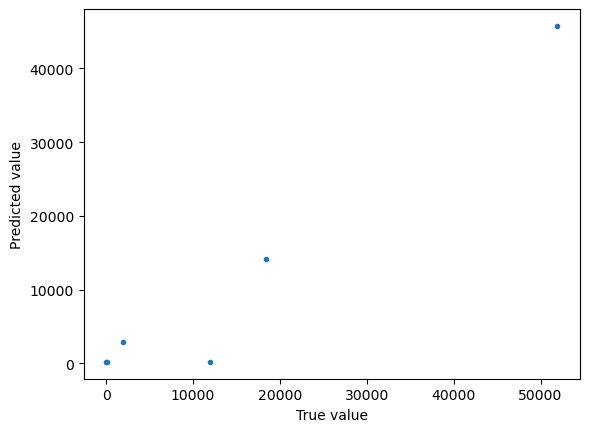

In [124]:
plt.plot(y_test, pred.prediction, '.')
plt.xlabel("True value")
plt.ylabel("Predicted value")

In [125]:
# Mean Absolute Error on test data
np.mean(np.abs(y_test-pred.prediction))

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'


total   NaN
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
dtype: float64

In [127]:
# load the data
csp = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    pd.DataFrame(csp.data), csp.target, stratify=csp.target, test_size=0.25,
    random_state=123
)

# train models with AutoML
automl = AutoML(mode="Perform")
automl.fit(X_train, y_train)

# compute the accuracy on test data
predictions = automl.predict_all(X_test)
print(predictions.head())
print("Test accuracy:", accuracy_score(y_test, predictions["label"].astype(int)))

AutoML directory: AutoML_9
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Linear', 'Random Forest', 'LightGBM', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
* Step simple_algorithms will try to check up to 1 model
1_Linear logloss 0.11709 trained in 3.15 seconds (1-sample predict time 0.0515 seconds)
* Step default_algorithms will try to check up to 4 models
2_Default_LightGBM logloss 0.119508 trained in 57.1 seconds (1-sample predict time 0.0555 seconds)
3_Default_Xgboost logloss 0.141544 trained in 34.88 seconds (1-sample predict time 0.049 seconds)
4_Default_NeuralNetwork logloss 0.244656 trained in 4.06 seconds (1-sample predict time 0.0518 seconds)
5_Default_RandomForest logloss 0.835827 trained in 10.88 seconds (1-sampl

In [128]:
# load the data
csp = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.25,
    random_state=123
)

# train models with AutoML
automl = AutoML(mode="Perform")
automl.fit(X_train, y_train)

# compute the accuracy on test data
predictions = automl.predict_all(X_test)
print(predictions.head())
print("Test accuracy:", accuracy_score(y_test, predictions))

AutoML directory: AutoML_10
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Linear', 'Random Forest', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
* Step simple_algorithms will try to check up to 1 model
1_Linear logloss 1.238823 trained in 5.31 seconds (1-sample predict time 0.0258 seconds)
* Step default_algorithms will try to check up to 5 models
2_Default_LightGBM logloss 8.2e-05 trained in 13.22 seconds (1-sample predict time 0.021 seconds)
3_Default_Xgboost logloss 0.039463 trained in 15.84 seconds (1-sample predict time 0.025 seconds)
4_Default_CatBoost logloss 0.000228 trained in 79.71 seconds (1-sample predict time 0.0213 seconds)
5_Default_NeuralNetwork logloss 0.944295 trained in 3.03 seconds

ValueError: Classification metrics can't handle a mix of continuous and continuous-multioutput targets